In [1]:
import numpy as np
import pandas as pd

C:\Users\sanou\AppData\Local\Temp\ipykernel_24228\1662815981.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# In this section, we first load the dataset into a pandas dataframe and then perform some basic exploratory data analysis (EDA).

In [2]:
df = pd.read_csv('ml_dataset.csv', delimiter=';')
df.head()
#df

,Unnamed: 0,Target,Message
0,0,internal company policy,Message-ID: <32715630.1075840547840.JavaMail.e...
1,1,alliances / partnerships,Message-ID: <8721012.1075863428380.JavaMail.ev...
2,2,internal company operations,Message-ID: <8687721.1075852656109.JavaMail.ev...
3,3,internal company operations,Message-ID: <16562450.1075846168630.JavaMail.e...
4,4,internal projects -- progress and strategy,Message-ID: <955111.1075858690252.JavaMail.eva...


In [3]:
#Labels

df['Target']

0                               internal company policy
1                              alliances / partnerships
2                           internal company operations
3                           internal company operations
4            internal projects -- progress and strategy
                             ...                       
874                         internal company operations
875                            alliances / partnerships
876                                      talking points
877          internal projects -- progress and strategy
878    regulations and regulators (includes price caps)
Name: Target, Length: 879, dtype: object

In [4]:
#Emails content
df['Message']

0      Message-ID: <32715630.1075840547840.JavaMail.e...
1      Message-ID: <8721012.1075863428380.JavaMail.ev...
2      Message-ID: <8687721.1075852656109.JavaMail.ev...
3      Message-ID: <16562450.1075846168630.JavaMail.e...
4      Message-ID: <955111.1075858690252.JavaMail.eva...
                             ...                        
874    Message-ID: <18983060.1075847582386.JavaMail.e...
875    Message-ID: <29879754.1075863427653.JavaMail.e...
876    Message-ID: <3001077.1075863428054.JavaMail.ev...
877    Message-ID: <13669071.1075863428696.JavaMail.e...
878    Message-ID: <5846581.1075852531032.JavaMail.ev...
Name: Message, Length: 879, dtype: object

In [5]:
df.drop(df.query(
    "Target == '' | Message == ''"
).index, inplace=True)

print(df.shape)

(879, 3)


# Our text features are present in the Message column and their corresponding labels are in target

In [6]:
print(f"There are {len(df)} rows in the dataset.")

There are 879 rows in the dataset.


# Features extraction

In [7]:
subject_list = []
for test_string in df['Message']:
    start_idx = test_string.find('Subject:')
    end_idx = test_string[start_idx:].find('\n')
    new_string = test_string[start_idx:start_idx+end_idx]
    subject_list.append(new_string)


df_subject_list = pd.DataFrame(subject_list, columns =['Subject'])
df_subject_list

,Subject
0,Subject: Confidential Information and Securiti...
1,Subject: FW: Venezuela FX and inflation foreca...
2,Subject: Enron Expatriates in India\r
3,Subject: Re: PLEASE READ & RESPOND\r
4,Subject: FW: ISO's Response to BPA Rebuttal of...
...,...
874,Subject: Message from Clark C. Smith\r
875,Subject: RE:\r
876,Subject: RE: Marketing Plan & Meetings\r
877,Subject: RE: Test Message\r


In [8]:
df_subject_list.drop(df_subject_list.query(
    "Subject == ''"
).index, inplace=True)

print(df_subject_list.shape)

(879, 1)


In [9]:
date_list = []
for test_string in df['Message']:
    start_idx = test_string.find('Date:')
    end_idx = test_string[start_idx:].find('\n')
    new_string = test_string[start_idx:start_idx+end_idx]
    date_list.append(new_string)


df_date_list = pd.DataFrame(date_list, columns =['Date'])
df_date_list

,Date
0,"Date: Wed, 11 Jul 2001 08:29:27 -0700 (PDT)\r"
1,"Date: Tue, 26 Jun 2001 09:40:17 -0700 (PDT)\r"
2,"Date: Wed, 13 Jun 2001 06:05:07 -0700 (PDT)\r"
3,"Date: Mon, 21 Aug 2000 00:30:00 -0700 (PDT)\r"
4,"Date: Sat, 16 Jun 2001 17:36:06 -0700 (PDT)\r"
...,...
874,"Date: Sun, 13 May 2001 12:37:00 -0700 (PDT)\r"
875,"Date: Mon, 25 Jun 2001 11:33:50 -0700 (PDT)\r"
876,"Date: Tue, 26 Jun 2001 08:58:12 -0700 (PDT)\r"
877,"Date: Wed, 27 Jun 2001 03:14:41 -0700 (PDT)\r"


In [10]:
df_date_list.drop(df_date_list.query(
    "Date == ''"
).index, inplace=True)

print(df_date_list.shape)

(879, 1)


In [11]:
from_list = []
for test_string in df['Message']:
    start_idx = test_string.find('From:')
    end_idx = test_string[start_idx:].find('\n')
    new_string = test_string[start_idx:start_idx+end_idx]
    from_list.append(new_string)


df_from_list = pd.DataFrame(from_list, columns =['From'])

df_from_list

,From
0,From: legalonline-compliance@enron.com\r
1,From: j.kaminski@enron.com\r
2,From: steven.kean@enron.com\r
3,From: steven.kean@enron.com\r
4,From: b..sanders@enron.com\r
...,...
874,From: steven.kean@enron.com\r
875,From: j.kaminski@enron.com\r
876,From: j.kaminski@enron.com\r
877,From: j.kaminski@enron.com\r


In [12]:
df_from_list.drop(df_from_list.query(
    "From == ''"
).index, inplace=True)

print(df_from_list.shape)

(879, 1)


# Analyzing features

Counter({'regulations and regulators (includes price caps)': 184, 'california energy crisis / california politics': 149, 'internal projects -- progress and strategy': 109, 'internal company operations': 78, 'political influence / contributions / contacts': 76, 'internal company policy': 67, ' company image -- current': 59, 'legal advice': 47, 'alliances / partnerships': 43, 'company image -- changing / influencing': 37, 'meeting minutes': 13, 'talking points': 13, 'trip reports': 4})


<BarContainer object of 13 artists>

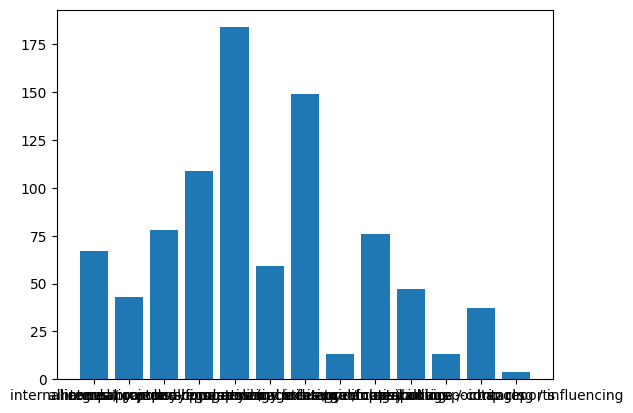

In [13]:
import matplotlib.pyplot as plt
from collections import Counter

c = np.asarray(df['Target'])
c_count = Counter(c)
print(c_count)
plt.bar(c_count.keys(), c_count.values())

In [14]:
from collections import Counter
c = np.asarray(df_subject_list['Subject'])
c_count = Counter(c)
c_count

Counter({'Subject: Energy Issues\r': 45,
         'Subject: \r': 28,
         'Subject: Confidential Information and Securities Trading\r': 16,
         'Subject: Enron Mentions\r': 8,
         'Subject: RE: Western Wholesale Activities - Gas & Power Conf. Call\r': 7,
         'Subject: RE: PG&E PX Credit Calculation -- CONFIDENTIAL ATTY CLIENT WORK\r': 5,
         'Subject: Re: CONFIDENTIAL - Residential in CA\r': 5,
         'Subject: California Power Crisis Update (No. 10)\r': 5,
         'Subject: Re: NEW DRAFT OF ENRON STATEMENT\r': 4,
         'Subject: TW Gas Sales: PRIVILEGED AND CONFIDENTIAL ATTORNEY CLIENT PRIVILEGE\r': 4,
         'Subject: FW:\r': 4,
         'Subject: Re:\r': 4,
         'Subject: Re: ATTORNEY CLIENT PRIVILEGDE - Draft FERC Brief on Settlement\r': 3,
         'Subject: RE: Important - CPUC Motion - Confidential Attorney ClientPrivil\r': 3,
         'Subject: Presentation to faculty and students at Berkeley\r': 3,
         'Subject: California Update--0717.

In [15]:
from collections import Counter
c = np.asarray(df_date_list['Date'])
c_count = Counter(c)
c_count

Counter({'Date: Mon, 31 Dec 1979 16:00:00 -0800 (PST)\r': 8,
         'Date: Wed, 6 Jun 2001 06:13:00 -0700 (PDT)\r': 7,
         'Date: Fri, 2 Mar 2001 02:32:00 -0800 (PST)\r': 5,
         'Date: Fri, 20 Apr 2001 07:59:00 -0700 (PDT)\r': 5,
         'Date: Wed, 28 Feb 2001 06:19:00 -0800 (PST)\r': 5,
         'Date: Thu, 8 Mar 2001 01:46:00 -0800 (PST)\r': 5,
         'Date: Tue, 27 Mar 2001 19:42:00 -0800 (PST)\r': 5,
         'Date: Thu, 22 Mar 2001 02:04:00 -0800 (PST)\r': 3,
         'Date: Wed, 21 Mar 2001 02:34:00 -0800 (PST)\r': 3,
         'Date: Fri, 23 Mar 2001 02:03:00 -0800 (PST)\r': 3,
         'Date: Wed, 28 Feb 2001 13:55:00 -0800 (PST)\r': 3,
         'Date: Thu, 24 May 2001 11:47:43 -0700 (PDT)\r': 2,
         'Date: Wed, 14 Nov 2001 12:44:57 -0800 (PST)\r': 2,
         'Date: Tue, 7 Nov 2000 11:08:00 -0800 (PST)\r': 2,
         'Date: Wed, 20 Jun 2001 04:02:00 -0700 (PDT)\r': 2,
         'Date: Mon, 2 Apr 2001 02:46:00 -0700 (PDT)\r': 2,
         'Date: Mon, 30 Apr 2

In [16]:
from collections import Counter
c = np.asarray(df_from_list['From'])
c_count = Counter(c)
c_count

Counter({'From: steven.kean@enron.com\r': 436,
         'From: john.shelk@enron.com\r': 83,
         'From: j.kaminski@enron.com\r': 45,
         'From: miyung.buster@enron.com\r': 31,
         'From: alan.comnes@enron.com\r': 16,
         'From: legalonline-compliance@enron.com\r': 14,
         'From: michelle.cash@enron.com\r': 14,
         'From: kevinscott@onlinemailbox.net\r': 13,
         'From: susan.mara@enron.com\r': 10,
         'From: jmunoz@mcnallytemple.com\r': 9,
         'From: jeff.dasovich@enron.com\r': 9,
         'From: richard.sanders@enron.com\r': 8,
         'From: mary.hain@enron.com\r': 8,
         'From: rod.hayslett@enron.com\r': 5,
         'From: rcarroll@bracepatt.com\r': 5,
         'From: ray.alvarez@enron.com\r': 5,
         'From: suzanne_nimocks@mckinsey.com\r': 5,
         'From: d..steffes@enron.com\r': 4,
         'From: susan.scott@enron.com\r': 4,
         'From: drew.fossum@enron.com\r': 4,
         'From: james.steffes@enron.com\r': 4,
         

# Testing and Training Data preparation

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn import svm
from sklearn.model_selection import GridSearchCV

# The splitting of x and y data into four parts: x_train,y_train,x_test, and y_test

In [18]:
x_data=df_subject_list['Subject']
y_data=df['Target']

split =(int)(0.3*df.shape[0])
x_train=x_data[:split]
x_test=x_data[split:]
y_train=y_data[:split]
y_test=y_data[split:]

# Convert features to numbeurs

In [19]:
count_vector = CountVectorizer()  
extracted_features = count_vector.fit_transform(x_train)
print(extracted_features)

  (0, 519)	1
  (0, 139)	1
  (0, 273)	1
  (0, 51)	1
  (0, 476)	1
  (0, 540)	1
  (1, 519)	1
  (1, 51)	1
  (1, 231)	1
  (1, 559)	1
  (1, 233)	1
  (1, 271)	1
  (1, 223)	1
  (1, 295)	1
  (1, 12)	1
  (2, 519)	1
  (2, 193)	1
  (2, 206)	1
  (2, 266)	1
  (2, 269)	1
  (3, 519)	1
  (3, 427)	1
  (3, 385)	1
  (3, 428)	1
  (3, 448)	1
  :	:
  (260, 212)	1
  (260, 534)	1
  (260, 267)	1
  (260, 513)	1
  (260, 121)	1
  (260, 357)	1
  (261, 519)	1
  (261, 105)	1
  (261, 352)	1
  (261, 183)	1
  (261, 465)	1
  (261, 294)	1
  (261, 331)	1
  (261, 365)	1
  (261, 282)	1
  (262, 519)	1
  (262, 139)	1
  (262, 427)	1
  (262, 537)	1
  (262, 363)	1
  (262, 69)	1
  (262, 114)	1
  (262, 204)	1
  (262, 187)	1
  (262, 174)	1


# Training the Model

In [20]:
tuned_parameters = {'kernel': ['rbf','linear'], 'gamma': [1e-3, 1e-4],'C': [1, 10, 100, 1000]}
model = GridSearchCV(svm.SVC(), tuned_parameters)
model.fit(extracted_features,y_train)

print("Model Trained Successfully!")

c:\Users\sanou\anaconda3\envs\gpu-env\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Model Trained Successfully!


# Computing Accuracy 

In [21]:
print("Accuracy of the model is: ",model.score(count_vector.transform(x_test),y_test)*100)

Accuracy of the model is:  30.1948051948052
